In [1]:
import os
import shutil
import math
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras._tf_keras.keras.optimizers import Adam

In [2]:
healthy_dir = "C:/Users/BharathKumar/Desktop/Tumour_Classification/Braintumor_New/Train/notumor"
meningioma_dir = "C:/Users/BharathKumar/Desktop/Tumour_Classification/Braintumor_New/Train/meningioma"
pituitary_dir = "C:/Users/BharathKumar/Desktop/Tumour_Classification/Braintumor_New/Train/pituitary"
glioma_dir = "C:/Users/BharathKumar/Desktop/Tumour_Classification/Braintumor_New/Train/glioma"


In [3]:
import random

# Define paths
base_dir = r"C:\Users\BharathKumar\Desktop\Tumour_Classification\Braintumor_New"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validation")

# Create validation folder if not exists
os.makedirs(val_dir, exist_ok=True)

# Percentage of data to be moved to validation set
val_split = 0.2  # 20% for validation

# Iterate through class subfolders in training set
for class_name in os.listdir(train_dir):
    class_train_path = os.path.join(train_dir, class_name)
    class_val_path = os.path.join(val_dir, class_name)

    # Ensursing the directory
    if os.path.isdir(class_train_path):
        os.makedirs(class_val_path, exist_ok=True)

        # List all files in the class folder
        images = os.listdir(class_train_path)
        random.shuffle(images)

        # Calculate number of images for validation
        val_size = int(len(images) * val_split)
        val_images = images[:val_size]

        # Move images to validation folder
        for img in val_images:
            src = os.path.join(class_train_path, img)
            dest = os.path.join(class_val_path, img)
            shutil.move(src, dest)

print("Dataset successfully split into training and validation sets.")


Dataset successfully split into training and validation sets.


In [4]:
train_dir = "C:/Users/BharathKumar/Desktop/Tumour_Classification/Braintumor_New/Train"
validate_dir = "C:/Users/BharathKumar/Desktop/Tumour_Classification/Braintumor_New/validation"
test_dir = "C:/Users/BharathKumar/Desktop/Tumour_Classification/Braintumor_New/Test"

In [5]:
os.makedirs(os.path.join(train_dir, 'healthy'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'meningioma'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'pituitary'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'glioma'), exist_ok=True)

os.makedirs(os.path.join(validate_dir, 'healthy'), exist_ok=True)
os.makedirs(os.path.join(validate_dir, 'meningioma'), exist_ok=True)
os.makedirs(os.path.join(validate_dir, 'pituitary'), exist_ok=True)
os.makedirs(os.path.join(validate_dir, 'glioma'), exist_ok=True)

os.makedirs(os.path.join(test_dir, 'healthy'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'meningioma'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'pituitary'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'glioma'), exist_ok=True)

In [6]:
# import os
# import shutil
# import numpy as np

# def split_data(source_dir, train_dir, validate_dir, test_dir, train_split=0.70, validate_split=0.15):
#     """
#     Splits data from the source directory into train, validation, and test directories.
    
#     Parameters:
#         source_dir (str): Path to the source directory containing images.
#         train_dir (str): Path to the training directory.
#         validate_dir (str): Path to the validation directory.
#         test_dir (str): Path to the testing directory.
#         train_split (float): Proportion of data to use for training (default: 0.70).
#         validate_split (float): Proportion of data to use for validation (default: 0.15).
#     """
#     # Ensure output directories exist
#     os.makedirs(train_dir, exist_ok=True)
#     os.makedirs(validate_dir, exist_ok=True)
#     os.makedirs(test_dir, exist_ok=True)

#     files = os.listdir(source_dir)
#     np.random.shuffle(files)  # Shuffle files to ensure random splitting

#     train_size = int(len(files) * train_split)
#     validate_size = int(len(files) * validate_split)

#     train_files = files[:train_size]
#     validate_files = files[train_size:train_size + validate_size]
#     test_files = files[train_size + validate_size:]

#     # Copy files to respective directories
#     for file in train_files:
#         shutil.copy(os.path.join(source_dir, file), os.path.join(train_dir, file))

#     for file in validate_files:
#         shutil.copy(os.path.join(source_dir, file), os.path.join(validate_dir, file))

#     for file in test_files:
#         shutil.copy(os.path.join(source_dir, file), os.path.join(test_dir, file))


# # Define source directories
# base_source_dir = r"C:\Users\BharathKumar\Desktop\Tumour_Classification\Braintumor_New"

# notumor_dir = os.path.join(base_source_dir, "Test", "notumor")
# glioma_dir = os.path.join(base_source_dir, "Test", "glioma")
# meningioma_dir = os.path.join(base_source_dir, "Test", "meningioma")
# pituitary_dir = os.path.join(base_source_dir, "Test", "pituitary")

# # Define target train, validation, and test directories
# base_target_dir = r"C:\Users\BharathKumar\Desktop\Tumour_Classification\Processed_Dat"

# train_dir = os.path.join(base_target_dir, "train")
# validate_dir = os.path.join(base_target_dir, "validate")
# test_dir = os.path.join(base_target_dir, "test")

# # Split data for each category
# split_data(notumor_dir, os.path.join(train_dir, 'notumor'),
#            os.path.join(validate_dir, 'notumor'),
#            os.path.join(test_dir, 'notumor'))

# split_data(glioma_dir, os.path.join(train_dir, 'glioma'),
#            os.path.join(validate_dir, 'glioma'),
#            os.path.join(test_dir, 'glioma'))

# split_data(meningioma_dir, os.path.join(train_dir, 'meningioma'),
#            os.path.join(validate_dir, 'meningioma'),
#            os.path.join(test_dir, 'meningioma'))

# split_data(pituitary_dir, os.path.join(train_dir, 'pituitary'),
#            os.path.join(validate_dir, 'pituitary'),
#            os.path.join(test_dir, 'pituitary'))

# print("Data has been successfully split into training, validation, and testing datasets.")


Data has been successfully split into training, validation, and testing datasets.


In [13]:
import tensorflow as tf

train_dir = r"C:\Users\BharathKumar\Desktop\Tumour_Classification\Braintumor_New\train"
validate_dir = r"C:\Users\BharathKumar\Desktop\Tumour_Classification\Braintumor_New\validation"
test_dir = r"C:\Users\BharathKumar\Desktop\Tumour_Classification\Braintumor_New\test"

# Load dataset directly
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, batch_size=32, image_size=(224, 224))
validate_data = tf.keras.preprocessing.image_dataset_from_directory(validate_dir, batch_size=32, image_size=(224, 224))
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, batch_size=32, image_size=(224, 224))

print("Dataset loaded successfully!")


Found 13990 files belonging to 5 classes.
Found 12328 files belonging to 5 classes.
Found 1925 files belonging to 5 classes.
Dataset loaded successfully!


In [14]:
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define dataset paths
# base_target_dir = r"C:\Users\BharathKumar\Desktop\Tumour_Classification\Processed_Data"

# train_dir = os.path.join(base_target_dir, "train")
# validate_dir = os.path.join(base_target_dir, "validate")
# test_dir = os.path.join(base_target_dir, "test")

# # Define image data generators
# train_datagen = ImageDataGenerator(rescale=1./255)
# validate_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# # Generate batches of images from directories
# train_generator = train_datagen.flow_from_directory(
#     train_dir, target_size=(75, 75), batch_size=32, class_mode='categorical')

# validate_generator = validate_datagen.flow_from_directory(
#     validate_dir, target_size=(75, 75), batch_size=32, class_mode='categorical')

# test_generator = test_datagen.flow_from_directory(
#     test_dir, target_size=(75, 75), batch_size=32, class_mode='categorical', shuffle=False)

# # Display class labels
# print(f"Class labels: {train_generator.class_indices}")

# # Print class distribution in train, validate, and test sets
# for dataset_name, generator in zip(["Train", "Validation", "Test"], 
#                                    [train_generator, validate_generator, test_generator]):
#     class_indices = generator.class_indices
#     class_labels = list(class_indices.keys())
    
#     print(f"\n{dataset_name} set class distribution:")
#     for i, label in enumerate(class_labels):
#         print(f"{label}: {np.sum(generator.classes == i)}")


In [16]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths (update to use your existing dataset)
base_target_dir = r"C:\Users\BharathKumar\Desktop\Tumour_Classification\Braintumor_New"

train_dir = os.path.join(base_target_dir, "train")
validate_dir = os.path.join(base_target_dir, "validation")
test_dir = os.path.join(base_target_dir, "test")

# Define ImageDataGenerators with normalization (rescale)
train_datagen = ImageDataGenerator(rescale=1./255)
validate_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of images from directories with correct image size
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(256, 256), batch_size=32, class_mode='categorical')

validate_generator = validate_datagen.flow_from_directory(
    validate_dir, target_size=(256, 256), batch_size=32, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(256, 256), batch_size=32, class_mode='categorical', shuffle=False)

# Display class labels
print(f"Class labels: {train_generator.class_indices}")

# Print class distribution in train, validate, and test sets
for dataset_name, generator in zip(["Train", "Validation", "Test"], 
                                   [train_generator, validate_generator, test_generator]):
    class_indices = generator.class_indices
    class_labels = list(class_indices.keys())

    print(f"\n{dataset_name} set class distribution:")
    for label, index in class_indices.items():
        print(f"{label}: {np.sum(generator.classes == index)}")


Found 13990 images belonging to 5 classes.
Found 12328 images belonging to 5 classes.
Found 1925 images belonging to 5 classes.
Class labels: {'glioma': 0, 'healthy': 1, 'meningioma': 2, 'notumor': 3, 'pituitary': 4}

Train set class distribution:
glioma: 2707
healthy: 2287
meningioma: 2743
notumor: 3268
pituitary: 2985

Validation set class distribution:
glioma: 2577
healthy: 1183
meningioma: 2613
notumor: 3112
pituitary: 2843

Test set class distribution:
glioma: 300
healthy: 614
meningioma: 306
notumor: 405
pituitary: 300


In [ ]:
#         import os
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define dataset paths
# base_target_dir = r"C:\Users\BharathKumar\Desktop\Tumour_Classification\Processed_Data"

# train_dir = os.path.join(base_target_dir, "train")
# validate_dir = os.path.join(base_target_dir, "validate")
# test_dir = os.path.join(base_target_dir, "test")

# # Image data generators with rescaling
# train_datagen = ImageDataGenerator(rescale=1./255)
# validate_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#     train_dir, target_size=(75, 75), batch_size=32, class_mode='categorical')

# validate_generator = validate_datagen.flow_from_directory(
#     validate_dir, target_size=(75, 75), batch_size=32, class_mode='categorical')

# # Model architecture
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(75, 75, 3)),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(4, activation='softmax')  # 4 output classes: notumor, glioma, meningioma, pituitary
# ])

# # Compile model
# model.compile(optimizer=Adam(learning_rate=0.0001), 
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])

# # Model summary
# model.summary()

# # Train the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=len(train_generator),
#     epochs=20,
#     validation_data=validate_generator,
#     validation_steps=len(validate_generator)
# )

# print("Model training completed.")


In [18]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
base_target_dir = r"C:\Users\BharathKumar\Desktop\Tumour_Classification\Braintumor_New"  # Use your dataset path

train_dir = os.path.join(base_target_dir, "train")
validate_dir = os.path.join(base_target_dir, "validation")
test_dir = os.path.join(base_target_dir, "test")

# Image data generators with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
validate_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(256, 256), batch_size=32, class_mode='categorical')

validate_generator = validate_datagen.flow_from_directory(
    validate_dir, target_size=(256, 256), batch_size=32, class_mode='categorical')

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 output classes: glioma, healthy, meningioma, notumor, pituitary
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validate_generator,
    validation_steps=len(validate_generator)
)

print("Model training completed.")


Found 13990 images belonging to 5 classes.
Found 12328 images belonging to 5 classes.


C:\Users\BharathKumar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,621 (56.61 MB)

 Trainable params: 14,839,621 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\BharathKumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 670s 2s/step - accuracy: 0.4551 - loss: 1.2270 - val_accuracy: 0.7254 - val_loss: 0.7214
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 552s 1s/step - accuracy: 0.6900 - loss: 0.7025 - val_accuracy: 0.7539 - val_loss: 0.6317
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 598s 1s/step - accuracy: 0.7185 - loss: 0.5976 - val_accuracy: 0.7738 - val_loss: 0.5689
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 550s 1s/step - accuracy: 0.7458 - loss: 0.5257 - val_accuracy: 0.8038 - val_loss: 0.5089
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 536s 1s/step - accuracy: 0.7785 - loss: 0.4460 - val_accuracy: 0.8059 - val_loss: 0.5004
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 535s 1s/step - accuracy: 0.7916 - loss: 0.4089 - val_accuracy: 0.7441 - val_loss: 0.5053
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 538s 1s/step - accuracy: 0.8060 - loss: 0.3687 - val_accuracy: 0.7638 - val_loss: 0.4873
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 537s 1s/step - accuracy: 0.8041 - loss: 0.3431 - val_accu

In [19]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image

# # Define paths
# model_save_path = r"C:\Users\BharathKumar\Desktop\Tumour_Classification\tumor_classification.keras"
# test_dir = r"C:\Users\BharathKumar\Desktop\Tumour_Classification\Processed_Data\test"

# # Plot Accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# # Plot Loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# # Save the trained model
# model.save(model_save_path)
# print(f"Model saved at: {model_save_path}")

# # Load the model
# loaded_model = load_model(model_save_path)
# print("Model loaded successfully.")

# # Function to predict a random image from the test dataset
# def predict_random_image(test_dir, model):
#     class_labels = ['notumor', 'glioma', 'meningioma', 'pituitary']  # Define class labels

#     # Choose a random subfolder (category) from the test dataset
#     random_category = np.random.choice(class_labels)
#     category_path = os.path.join(test_dir, random_category)

#     # Choose a random image from the selected category
#     random_image_filename = np.random.choice(os.listdir(category_path))
#     random_image_path = os.path.join(category_path, random_image_filename)

#     # Load and preprocess the image
#     img = image.load_img(random_image_path, target_size=(75, 75))
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
#     img_array /= 255.0  # Normalize pixel values

#     # Predict the class
#     prediction = model.predict(img_array)
#     predicted_class = class_labels[np.argmax(prediction)]
#     confidence = np.max(prediction) * 100  # Get confidence percentage

#     # Display the image and prediction
#     plt.imshow(img)
#     plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
#     plt.axis('off')
#     plt.show()

#     print(f"Actual category: {random_category}")
#     print(f"Predicted category: {predicted_class} with {confidence:.2f}% confidence")

# # Test the model on a random image
# predict_random_image(test_dir, loaded_model)


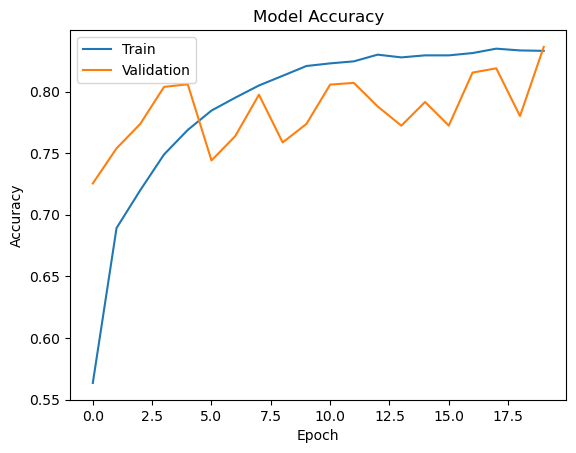

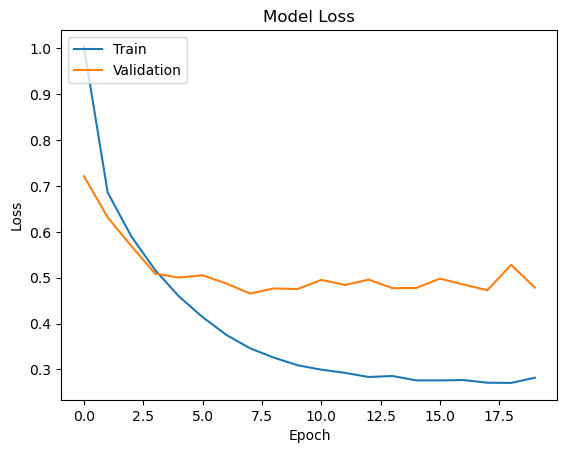

Model saved at: C:\Users\BharathKumar\Desktop\Tumour_Classification\tumor_classification.keras


In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

# Define paths
model_save_path = r"C:\Users\BharathKumar\Desktop\Tumour_Classification\tumor_classification.keras"

# Assume `model` and `history` exist after training
# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Save the trained model
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")


Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


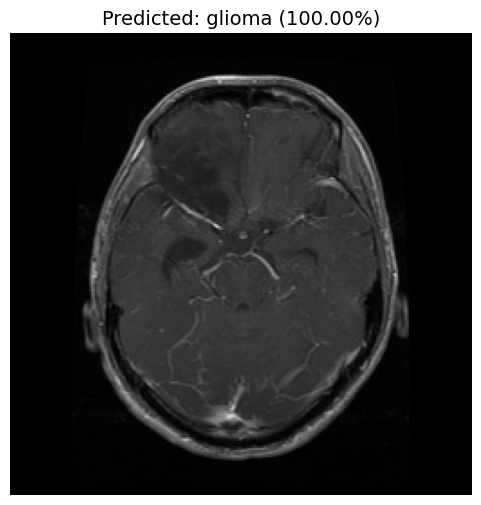

Actual category: glioma
Predicted category: glioma with 100.00% confidence


In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image, ExifTags

# Define paths
model_save_path = r"C:\Users\BharathKumar\Desktop\Tumour_Classification\tumor_classification.keras"
test_dir = r"C:\Users\BharathKumar\Desktop\Tumour_Classification\Braintumor_New\test"

# Load the model
loaded_model = load_model(model_save_path)
print("Model loaded successfully.")

# Function to correct image orientation using EXIF metadata
def correct_orientation(img):
    try:
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == "Orientation":
                break
        exif = img._getexif()
        if exif is not None:
            orientation = exif.get(orientation, None)
            if orientation == 3:
                img = img.rotate(180, expand=True)
            elif orientation == 6:
                img = img.rotate(270, expand=True)
            elif orientation == 8:
                img = img.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        pass
    return img

# Function to predict a random image from the test dataset
def predict_random_image(test_dir, model):
    class_labels = ['glioma', 'healthy', 'meningioma', 'notumor', 'pituitary']  # Updated class labels

    # Choose a random subfolder (category) from the test dataset
    random_category = np.random.choice(class_labels)
    category_path = os.path.join(test_dir, random_category)

    # Choose a random image from the selected category
    random_image_filename = np.random.choice(os.listdir(category_path))
    random_image_path = os.path.join(category_path, random_image_filename)

    # Load and preprocess the image
    img = Image.open(random_image_path)
    img = correct_orientation(img)  # Fix orientation if needed
    img = img.resize((256, 256))  # Resize the image
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction) * 100  # Get confidence percentage

    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)", fontsize=14)
    plt.axis('off')
    plt.show()

    print(f"Actual category: {random_category}")
    print(f"Predicted category: {predicted_class} with {confidence:.2f}% confidence")

# Test the model on a random image
predict_random_image(test_dir, loaded_model)
